# Lecture 9
## Symbolic Non Linear Optimization (Part 1)
## Date: 20.11

Before starting with **numerical Non Linear Optimization** within Julia is worth mentioning how to solve optimization problems **symbolically**. 

Generally, pieces of software that deals with such problems are called **Computer Algebra System**.

Commercial suites include: **Maple**, **Mathematica** and partly **Matlab**.

**Free and opensource alternatives** exists and in most cases are at the same level as commercial competitors.

Worth mentioning open CAS are:
* Sagemath;
* Maxima;
* Scilab;
* SymPy.

An interesting characteristic of opensource CAS is that they tend to form a **network**, meaning that a piece of free software like **Sagemath** has bindings to many other CAS such as **Maxima** and **Sympy**. 

This allows taking the **good features** of each package.  

In this tutorial we'll use **SymPy** and its integration into **Julia**.

## SymPy

We start by initializing the libraries we'll use:

In [1]:
using SymPy;
using Plots;

This SymPy package provides a **light interface** for the features of the SymPy library that makes working with SymPy objects a bit easier within Julia.

### Symbols

Symbolic variables are at the core of CAS, in SymPy we can initialize them in three ways.

In [2]:
l1, l2, l3  = Sym("lambda_1 lambda_2 lambda_3")

(lambda_1, lambda_2, lambda_3)

In [3]:
l1

λ₁

In [4]:
l2 

λ₂

In [5]:
l3

λ₃

In [6]:
@vars λ₁ λ₂ λ₃

(λ₁, λ₂, λ₃)

The first method allows for a degree of customization far superior in terms of formatting, take a look at the example:

In [7]:
l1 = Sym("\\int_{1}^{\\infty}\\lambda_1")

\int_{1}_1__{\infty}\lambda

Bear in mind that I **just** defined the name of the **variable** and not the **definite integral!**

Sometimes we need to attach assumptions to symbols such as positivity and so forth. 

For this type of initialization we can use ```symbols()```.

In [8]:
x = symbols("x", positive=true)
solve(x + 1)

0-element Array{Any,1}

In [9]:
x = symbols("x")
solve(x + 1)

1-element Array{Sym,1}:
 -1

### Substitution

Substitution of symbolic coefficients can be done in two ways.

In [10]:
@vars x y
ex = x^2 + 1
ex.subs(x, y)

 2    
y  + 1

For multiple substitutions

In [11]:
@vars x t y
ex = x + t - y
ex(x => 0, t => 1)

1 - y

### Collection, Factorization and Simplification

Collection of expression's elements in Sympy can be done using the ```collect``` function as follows:

In [12]:
q = x*y + x*y^2 + x^2*y + x

 2        2          
x ⋅y + x⋅y  + x⋅y + x

In [13]:
collect(q, x)

 2       ⎛ 2        ⎞
x ⋅y + x⋅⎝y  + y + 1⎠

Factorization is done with ```factor```

In [14]:
p = x^2 + 3x + 2

 2          
x  + 3⋅x + 2

In [15]:
j = factor(p)

(x + 1)⋅(x + 2)

The opposite is the ```expand``` command

In [16]:
j

(x + 1)⋅(x + 2)

In [17]:
expand(j)

 2          
x  + 3⋅x + 2

When calling ```simplify``` Sympy tries a series of algorithms to further simplify the function:

In [18]:
q

 2        2          
x ⋅y + x⋅y  + x⋅y + x

In [19]:
simplify(q)

  ⎛       2        ⎞
x⋅⎝x⋅y + y  + y + 1⎠

### Solvers

Sympy provides a series of solvers ranging from ```real_roots``` to ```solveset```.

In this tutorial we'll introduce ```solve``` and ```solveset```.

In [20]:
f = x^2 + 3x -4

 2          
x  + 3⋅x - 4

In [21]:
solve(f)

2-element Array{Sym,1}:
 -4
  1

The ```solveset``` function is intended to be a **replacement** of the ```solve```, **however** by the time of this tutorial ```solve``` solve has not been deprecated.

In [22]:
solveset(f)

{-4, 1}

Why is ```solveset``` better than ```solve```?

In [23]:
f = sin(x)

sin(x)

In [24]:
solve(f)

2-element Array{Sym,1}:
  0
 pi

In [25]:
solveset(f)

{2⋅n⋅π | n ∊ ℤ} ∪ {2⋅n⋅π + π | n ∊ ℤ}

### Plotting

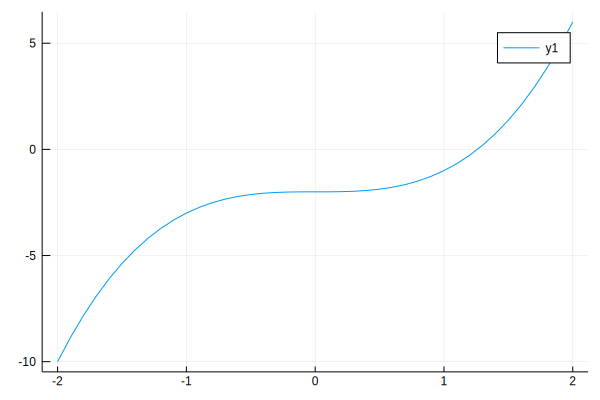

In [52]:
x = symbols("x")

plot(x^3 - 2, -2:0.1:2)

### Derivatives and partial derivatives

In [27]:
l(x) = sin(x)
k(x,y) = x^2*y - x*y^2

k (generic function with 1 method)

Derivatives in Sympy are as easy as:

In [28]:
diff(l(x),x)

cos(x)

And partial derivatives are simply given by:

In [29]:
diff(k(x,y),x,y)

2⋅(x - y)

Sympy provides also a method for evaluating the Hessian matrix:

In [56]:
k(x,y)

 2        2
x ⋅y - x⋅y 

In [54]:
hessian(k(x,y),(x,y))

2×2 Array{Sym,2}:
       2*y  2*x - 2*y
 2*x - 2*y       -2*x

Last but not least, derivatives can also be **unevaluated**, as in the case of differential equations, or if we do not know the function fully.

In [31]:
ex = sympy.Derivative(exp(x*y), x, y, 2)

   3        
  ∂   ⎛ x⋅y⎞
──────⎝ℯ   ⎠
  2         
∂y  ∂x      

And if we want to evaluate it:

In [32]:
ex.doit()

             x⋅y
x⋅(x⋅y + 2)⋅ℯ   

#### Side note
Can we solve differential equations in Sympy?

Of course!

Take for example the following first order differential equation:

$$ \dot{x}(t) + 2tx(t) = t^3$$

we can define and solve it in the following way.

In [57]:
t = symbols("t")
x = SymFunction("x")

x(t)

x(t)

In [58]:
eq = sympy.Derivative(x(t), t) + 2t * x(t) -t^3

   3              d       
- t  + 2⋅t⋅x(t) + ──(x(t))
                  dt      

In [59]:
#another way
eq = x'(t) + 2t * x(t) - t^3

   3              d       
- t  + 2⋅t⋅x(t) + ──(x(t))
                  dt      

In [60]:
dsolve(eq, x(t))

             2    2    
           -t    t    1
x(t) = C₁⋅ℯ    + ── - ─
                 2    2

In [61]:
#with initial condition
result = dsolve(eq, x(t), ics = (x,0,1/2))

        2              2
       t    1        -t 
x(t) = ── - ─ + 1.0⋅ℯ   
       2    2           

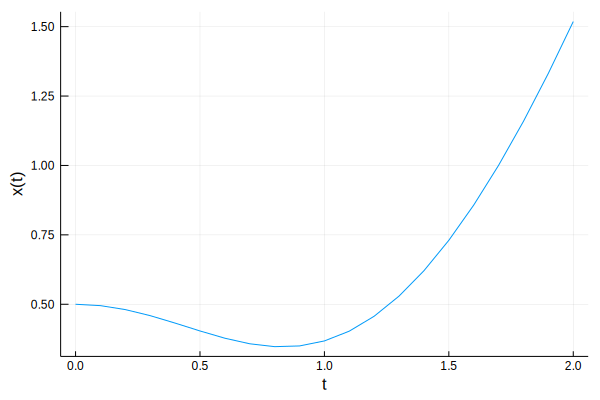

In [64]:
plot(result.rhs, 0:0.1:2, xlabel = "t", ylabel = "x(t)", legend = false)

### Exercises

In [88]:
@vars x y

(x, y)

#### Ex 1 

Given $g(x,y)$ as:

$$ g(x,y) = (1+y)^3 x^2 + y^2  $$

* Find its stationary points;
* State the nature of the stationary points found so far;
* Consider the point $(0,0)$ state its eigenvalues.

##### Solution

In [89]:
g(x,y) = (1+y)^3 * x^2 + y ^2

g (generic function with 1 method)

In [90]:
∇g = [diff(g(x,y),i) for i in (x,y)]

2-element Array{Sym,1}:
         2*x*(y + 1)^3
 3*x^2*(y + 1)^2 + 2*y

In [91]:
critical_points = solve(∇g)

1-element Array{Dict{Any,Any},1}:
 Dict(x => 0,y => 0)

In [92]:
Hg = hessian(g(x,y),[x,y])

2×2 Array{Sym,2}:
   2*(y + 1)^3        6*x*(y + 1)^2
 6*x*(y + 1)^2  3*x^2*(2*y + 2) + 2

In [93]:
Hg_in_P = [subs(Hg[i,j],critical_points[1]) for i in 1:2, j in 1:2]

2×2 Array{Sym,2}:
 2  0
 0  2

In [97]:
using LinearAlgebra

In [95]:
eigvals(Hg_in_P)

1-element Array{Sym,1}:
 2

#### Ex 2 

Given $h(x,y)$ as:

$$ h(x,y) = e^x(2x^2-xy+y^2) $$

Define an algorithm that:

1. Find its stationary points.
2. State the nature of the stationary points found so far.

Hint: loop on the critical points

##### Solution

In [99]:
h(x,y) = exp(x)*(2x^2 -x*y + y^2)

h (generic function with 1 method)

In [100]:
#Compute gradient
∇h = [diff(h(x,y),i) for i in free_symbols(h(x,y))];

#Get the critical points
critical_points = solve(∇h);

#Compute the Hessian
Hh = hessian(h(x,y),[x,y]);

In [101]:
for q in critical_points 
    global H_in_P = [subs(Hh[i,j],q) for i in 1:2, j in 1:2]
    println("The point")
    println(q)
    
    if prod([i>0  for i in eigvals(H_in_P)])
        println("The point is a local minimum")
    elseif prod([i<0  for i in eigvals(H_in_P)])
        println("The point is a local maximum")    
    else 
        println("The point is a saddle")
    end
    
    println("")
    
end

The point
Dict{Any,Any}(x => -2,y => -1)
The point is a saddle

The point
Dict{Any,Any}(x => 0,y => 0)
The point is a local minimum

